# C0TB1060 蒲原紳乃輔

# 本日の課題


*   ここまで，工夫しながら各自で作業した記録をレポートとして提出してください．（参考：[FAQ: レポートの提出法について](https://classroom.google.com/c/Mjc2NTU1ODUyMzY3/m/MzE2MjgxODIyNTEx/details) ）

*   余力がある人は，来週の予習を兼ねて 
```iris = datasets.load_iris()```
の代わりに 
```digits = datasets.load_digits()```
で読み込んだデータ digits に対して，同じような操作をしてみよう．

# データの可視化に関する少し進んだ話題

[Matplotlib](https://matplotlib.org/) ライブラリを使うと，簡単な操作でデータを可視化することができる．
詳しい使い方は必要に応じて次週以降に順次触れていくが，その一端を味わってみよう．

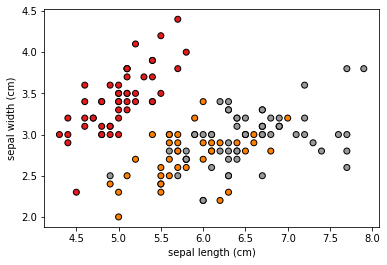

In [ ]:
import matplotlib.pyplot as plt
iris = datasets.load_iris()

# 次の i と j の組合せを {0,1,2,3} の中から色々と変えてみよう． 
i = 0  
j = 1

plt.scatter(iris.data[:,i], iris.data[:,j], c=iris.target,
            cmap=plt.cm.Set1, edgecolor='k')

plt.xlabel(iris['feature_names'][i])
plt.ylabel(iris['feature_names'][j])

plt.show()

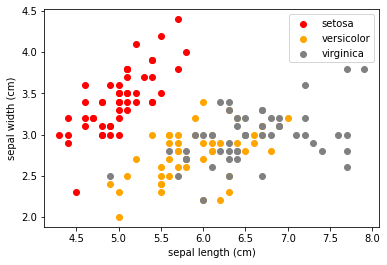

In [ ]:
# こんな書き方をすると凡例も表示できる．
import matplotlib.pyplot as plt
iris = datasets.load_iris()

# 次の i と j の組合せを {0,1,2,3} の中から色々と変えてみよう． 
i = 0  
j = 1

for (t, color) in [(0, "red"), (1, "orange"), (2, "grey")]: 
    plt.scatter(iris.data[:,i][iris.target==t], 
                iris.data[:,j][iris.target==t], 
                c=color, 
                label=iris['target_names'][t])

plt.xlabel(iris['feature_names'][i])
plt.ylabel(iris['feature_names'][j])
plt.legend()

plt.show()

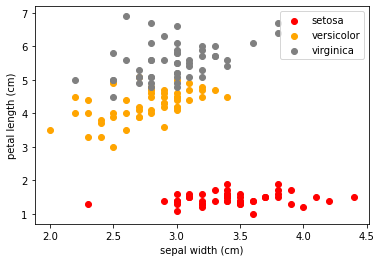

In [38]:
# 次の i と j の組合せを {0,1,2,3} の中から色々と変えてみよう． 
i = 1 
j = 2

for (t, color) in [(0, "red"), (1, "orange"), (2, "grey")]: 
    plt.scatter(iris.data[:,i][iris.target==t], 
                iris.data[:,j][iris.target==t], 
                c=color, 
                label=iris['target_names'][t])

plt.xlabel(iris['feature_names'][i])
plt.ylabel(iris['feature_names'][j])
plt.legend()

plt.show()

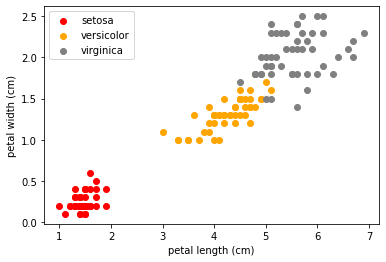

In [39]:
# 次の i と j の組合せを {0,1,2,3} の中から色々と変えてみよう． 
i = 2
j = 3

for (t, color) in [(0, "red"), (1, "orange"), (2, "grey")]: 
    plt.scatter(iris.data[:,i][iris.target==t], 
                iris.data[:,j][iris.target==t], 
                c=color, 
                label=iris['target_names'][t])

plt.xlabel(iris['feature_names'][i])
plt.ylabel(iris['feature_names'][j])
plt.legend()

plt.show()

# **課題レポート 線形判別分離を用いたデータの分類**
おそらく次回あたりにやるであろうirisデータの分類を行う。上のグラフでsetosa versicolor virginica の3クラスをプロットしている。特徴量データは4つある。まずそのまま全部のデータを使って学習してみる。そして、正答率がどの程度か判断する。しかし、4つのデータ全てを使わないと学習が進まないのであろうかと疑問に思った。そこで、重要なデータは残したままデータの次元を削減し、手を加えたものでも学習できるか調べることにした。機械学習アルゴリズムでは次元削減の方法としてPCA(主成分分析)や(LDA)線形判別分析などがある。今回は線形判別分析を使って4次元のデータを2次元の部分空間に写像し、それらのデータを学習に用いる。LDAは任意のクラスの数に対応できるアルゴリズムであるが、今回一からコードを書いて実装しようと思うので、二値問題に限らせてもらう(多クラス分類は今後勉強していきます）。今回は、versicolorとverginicaの２つのデータの分類を行う。

# 用いるアルゴリズム 
線形判別分析　LDA 理論を学習した際に用いたノート \
 https://drive.google.com/file/d/1oXzvcvfi76-ATxnICLRLettJZ-Demk6v/view?usp=sharing \
サポートベクトルマシン

# 検証①
versicolorとvirginicaのデータを何も手を加えないまま学習させると、学習をどこまで進むかを確かめてみる

In [1]:
#分類期器としてsupport vector mashine を用いる
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='linear',C=1.0,gamma=0.1,random_state=1)

In [2]:
#versicolorとverginicaの分離を行う
#dataset を読み込み、データをversicolor と verginica 
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split 
iris = datasets.load_iris()

x = iris.data
y = iris.target

#versicolorとverginicaのデータのみ抽出
x = x[51:,:]
y = y[51:]

#トレーニングデータと検証データに分割する
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train

array([[6.3, 2.7, 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.8, 4.8, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [6.2, 2.2, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3. , 5.1, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [7.4, 2.8, 6.1, 1.9],
       [6.3, 3.3, 4.7, 1.6],
       [5.9, 3. , 4.2, 1.5],
       [5.6, 2.7, 4.2, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 3.2, 5.3, 2.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 3.4, 5.6, 2.4],
       [5.4, 3. , 4.5, 1.5],
       [5.7, 3. , 4.2, 1.2],
       [6. , 3.4, 4.5, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.5, 3. , 5.8, 2.2],
       [5.7, 2.5, 5. , 2. ],
       [6. , 2.2, 4. , 1. ],
       [6.5, 3. , 5.5, 1.8],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 2.9, 5.6, 1.8],
       [5.2, 2.7, 3.9, 1.4],
       [6.9, 3.1, 5.4, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3.3, 5.7, 2.5],
       [6.6, 2.9, 4.6, 1.3],
       [6.7, 3.1, 5.6, 2.4],
       [5.8, 2

In [3]:
type(x) #xのデータの型を調べる(numpy array)

numpy.ndarray

In [4]:
#学習を行うためのメソッド
svm.fit(x_train,y_train)
#トレーニングデータ並びにテストデータを用いて予測する
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

#正答率を表示する
print("score of raw train data:",accuracy_score(y_train,y_pred_train))
print("score of raw test data :", accuracy_score(y_test,y_pred_test))

score of raw train data: 0.9855072463768116
score of raw test data : 0.9666666666666667


実行した際、トレーニングデータの正答率が95%、テストデータの正答率が96%と比較的に高かった。つまり、学習がうまく進み未知のデータにもうまく対処できる良いモデルであることがわかる。

# 検証② LDAを用いた次元削減
このまま終わりでもsklearnの使い方を学ぶには良いのだが、それでは少しつまらない。我々がデータを扱う際に、少ないデータで精度を上げることができたらとてもうれしい。よって、上でも述べた通り、4次元特徴量を2次元に写像することで得たデータを学習することで検証①で得られた正答率が期待できるのであろうか実験してみる。

LDAの説明はここでは省くが、詳しい説明はノートに載せたので上のリンクを参照

In [5]:
#LDAのクラスを定義する
class LDA(object):
  def __init__(self):
    pass
  
  def fit(self,x,y):
    #学習効率のアップのため標準化を行う(mean:0 std:1)
    x_std = (x - x.mean())/x.std()

    #平均ベクトルmu1 m2を計算
    np.set_printoptions(precision=4)
    self.mean_vec = []

    for label in np.unique(y):
      self.mean_vec.append(np.mean(x_std[y==label],axis=0))
    
    self.mean_vec = np.array(self.mean_vec)
    
    #クラス0 1 の共分散行列S_Wを求める
    d = 4 #特徴量の数
    self.S_W = np.zeros((d,d))
    for label in np.unique(y):
      self.cov = np.cov(x_std[y==label].T)
      self.S_W += self.cov 
    
    #クラス間の変動行列 S_Bを求める
    d = 4
    self.S_B = np.zeros((d,d))
    self.cov_mean = np.cov((self.mean_vec[0,:] - self.mean_vec[1,:]).T)
    self.S_B += self.cov_mean 

    #フィッシャー関数J(w) = (mu_1 - mu_2)^2 / (var_1^2 + var_2^2)の最大化
    # J(w)のw成分の偏微分値が最大になるときの線形写像w を求める
    # 解析的に計算すると inv(S_W)・S_B w = λw が得られ、固有値問題となる
    # 上式の寄与率が最も高い固有ベクトルを用いてwを生成する

    #固有値問題を解く
    self.eigen_vals,self.eigen_vecs = np.linalg.eig(np.linalg.inv(self.S_W).dot(self.S_B))
    #固有値の大きい順に入れ替える
    self.eigen_pairs = [(self.eigen_vals[i],self.eigen_vecs[:,i]) for i in range(len(self.eigen_vals))]
    self.eigen_pairs = sorted(self.eigen_pairs,key=lambda k: k[0], reverse=True)

    #最も特徴説明率のあるベクトルを用いて変換行列を作成
    self.w_ = np.hstack((self.eigen_pairs[0][1][:,np.newaxis].real,self.eigen_pairs[1][1][:,np.newaxis].real))

    #線形写像を作用させ、更新した特徴量をx_ldaとする
    self.x_lda = np.dot(x_std,self.w_)

  def fit_transform(self,x,y):
    return self.x_lda 

In [6]:
lda = LDA()
lda.fit(x,y)
x_lda = lda.fit_transform(x,y)

print("x_lda = \n",x_lda)

x_lda = 
 [[ 1.3076  0.6118]
 [ 1.3273  0.5522]
 [ 1.5165  0.3251]
 [ 1.3579  0.4485]
 [ 1.4783  0.4559]
 [ 1.2574  0.5773]
 [ 1.6389  0.5196]
 [ 1.4469  0.5596]
 [ 1.4198  0.4388]
 [ 1.6946  0.3399]
 [ 1.3291  0.538 ]
 [ 1.6701  0.4259]
 [ 1.4143  0.4665]
 [ 1.4206  0.6336]
 [ 1.3576  0.6478]
 [ 1.3536  0.4617]
 [ 1.6214  0.5863]
 [ 1.4324  0.2041]
 [ 1.5881  0.4916]
 [ 1.1821  0.4227]
 [ 1.4403  0.5741]
 [ 1.4155  0.2643]
 [ 1.5299  0.4907]
 [ 1.4362  0.5908]
 [ 1.3723  0.5998]
 [ 1.4123  0.4743]
 [ 1.2465  0.4157]
 [ 1.3544  0.4588]
 [ 1.6037  0.6368]
 [ 1.5974  0.4601]
 [ 1.6439  0.508 ]
 [ 1.5069  0.556 ]
 [ 1.3589  0.2508]
 [ 1.3591  0.4437]
 [ 1.2429  0.6221]
 [ 1.322   0.567 ]
 [ 1.516   0.3316]
 [ 1.4356  0.5905]
 [ 1.4926  0.4031]
 [ 1.5541  0.4079]
 [ 1.397   0.5219]
 [ 1.5242  0.5006]
 [ 1.648   0.4897]
 [ 1.4768  0.4572]
 [ 1.4901  0.6147]
 [ 1.4502  0.5441]
 [ 1.4418  0.5728]
 [ 1.5534  0.5943]
 [ 1.4567  0.5216]
 [ 0.8611  0.0798]
 [ 1.2089  0.1381]
 [ 1.0767  0.1777]
 [

3次元以下は座標にプロットすることができるので、せっかくなのでプロットしてみよう。

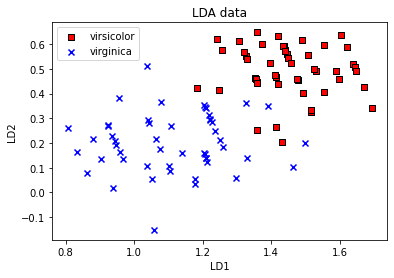

In [7]:
import matplotlib.pyplot as plt
markers = ('s', 'x')
colors = ('red', 'blue')
labels = ['setosa','virsicolor','virginica']

for label,c,m in zip(np.unique(y),colors,markers):
  plt.scatter(x_lda[:,0][y==label],x_lda[:,1][y==label],c=c,marker=m,label=labels[label],edgecolor='black')

plt.legend(loc='best')
plt.title("LDA data")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()

かっこいい図が得られた。ここで注意することは、x y の特徴データがもとのwidth や length ではないことである。機械学習ではもとの特徴量データを加工することはよくあるのである。次に次元削減したデータを同じ分器を用いて学習精度がどのように変化するか調べる。正答率が上がるor変わらないのであれば、線形判別分析をした甲斐がある。


In [8]:
#次元削減して得られたデータを教師データと検証用データに分割する
#上と同じsvmを用いている
x_lda_train,x_lda_test,y_train,y_test = train_test_split(x_lda,y,test_size=0.3)
svm.fit(x_lda_test,y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

最後に分類器をもとに機械がどのようにして分類したかがわかる境界面を作成する。mlxtendのplot_decision_regions関数を使えば簡単に実装可能なのだが、勉強のために自分で書いてみた。

In [23]:
#境界面のプロット
def plot_decision_regions(x, y, classifier, title,resolution=0.01):
    
  import matplotlib.pyplot as plt 
  import numpy as np 

  # マーカーと色の準備
  markers = ('s', 'x', 'o')
  colors = ('red', 'blue' ,'green')

  # LD1の最大値と最小値を求める
  x1_min, x1_max = x[:, 0].min() -0.1, x[:, 0].max() +0.1
  # LD2の最大値と最小値を求める
  x2_min, x2_max = x[:, 1].min() -0.1, x[:, 1].max() +0.1
  # 格子点の座標をresolution(0.01)ごとに取得
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  # 分類器を使って、zにデータを格納
  z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z = z.reshape(xx1.shape)
  # 格子点とデータをもとに線をプロット
  plt.contourf(xx1, xx2, z, alpha=0.1,levels=3,colors=["darkorange","darkblue"])
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  markers = ('s', 'x')
  colors = ('red', 'blue')
  labels = ['setosa','virsicolor','virginica']

  for i, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=colors[i], marker=markers[i], label=labels[cl],edgecolor="k")

  plt.legend(loc='best')
  plt.title(title)
  plt.xlabel("LD1")
  plt.ylabel("LD2")
  plt.show()

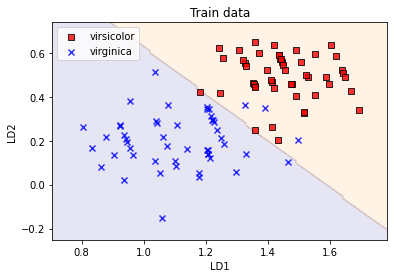

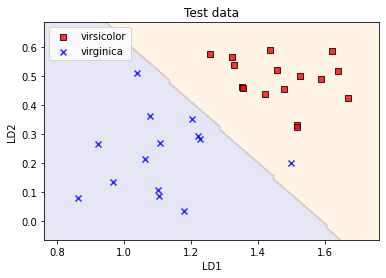

In [24]:
#トレーニングデータの分割領域の作成
plot_decision_regions(x_lda,y,svm,'Train data')
#テストデータの分割領域の作成
plot_decision_regions(x_lda_test,y_test,svm,'Test data')

検証①と同様にトレーニングデータとテストデータの両方の正当率を計算する

In [11]:
y_lda_train_pred = svm.predict(x_lda_train)
y_lda_test_pred = svm.predict(x_lda_test)

print("score of processed train data :",accuracy_score(y_lda_train_pred,y_train))
print("score of processed test data :",accuracy_score(y_lda_test_pred,y_test))

score of processed train data : 0.9565217391304348
score of processed test data : 0.9666666666666667


トレーニングデータとテストデータの両方で、4次元のデータを使った時と同等の正答率が得られた。これが次元削減の威力である！

# 力を入れた点
1. 今後の予習としてsvmや次元削減の内容を積極的に取り入れたこと
2. サポートベクトルマシン以外はライブラリーに頼らずに実装したこと（最初はsvmではなく単層パーセプトロンを使う予定だったが、あまり精度がでずに途中でよくわからなくなった。次回以降で余力があったらトライする)
3. 実装だけではなく、アルゴリズムもちゃんと学習したこと(ノートにその時の記録がある)
4. データの可視化としてmatplotlibで散布図や境界面をプロットした。深層学習等を学習し始めると、データの形が多次元のテンソルとなりもはや我々の目に見える形で可視化することは困難である。今回は、データの可視化をするのに良い機会となった。